In [83]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
import warnings 
warnings.simplefilter('ignore')


In [84]:
df = pd.read_csv("/Users/Sami/Desktop/VS Code projects/Student Success/4.4k dropout and student academic success .csv", delimiter=';')

In [85]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [87]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [88]:
df.duplicated().sum()

0

In [89]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [90]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [91]:
df["Target"] = df ["Target"].map({'Dropout' : 0,
                                'Enrolled' : 1,
                                'Graduate': 2,
                                  })

In [92]:
df["Target"]

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [93]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [94]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [95]:
df['Target'].info

<bound method Series.info of 0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64>

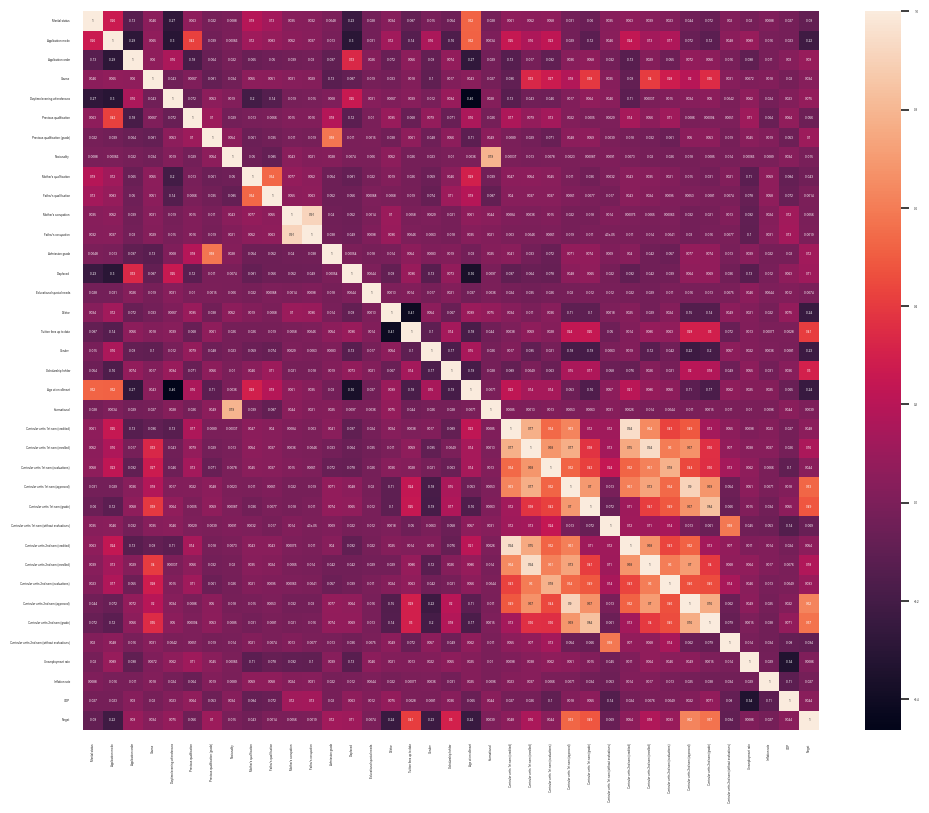

In [96]:
plt.figure(figsize=(10, 8))  # Increase figure size

sns.set(font_scale=0.19)
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()


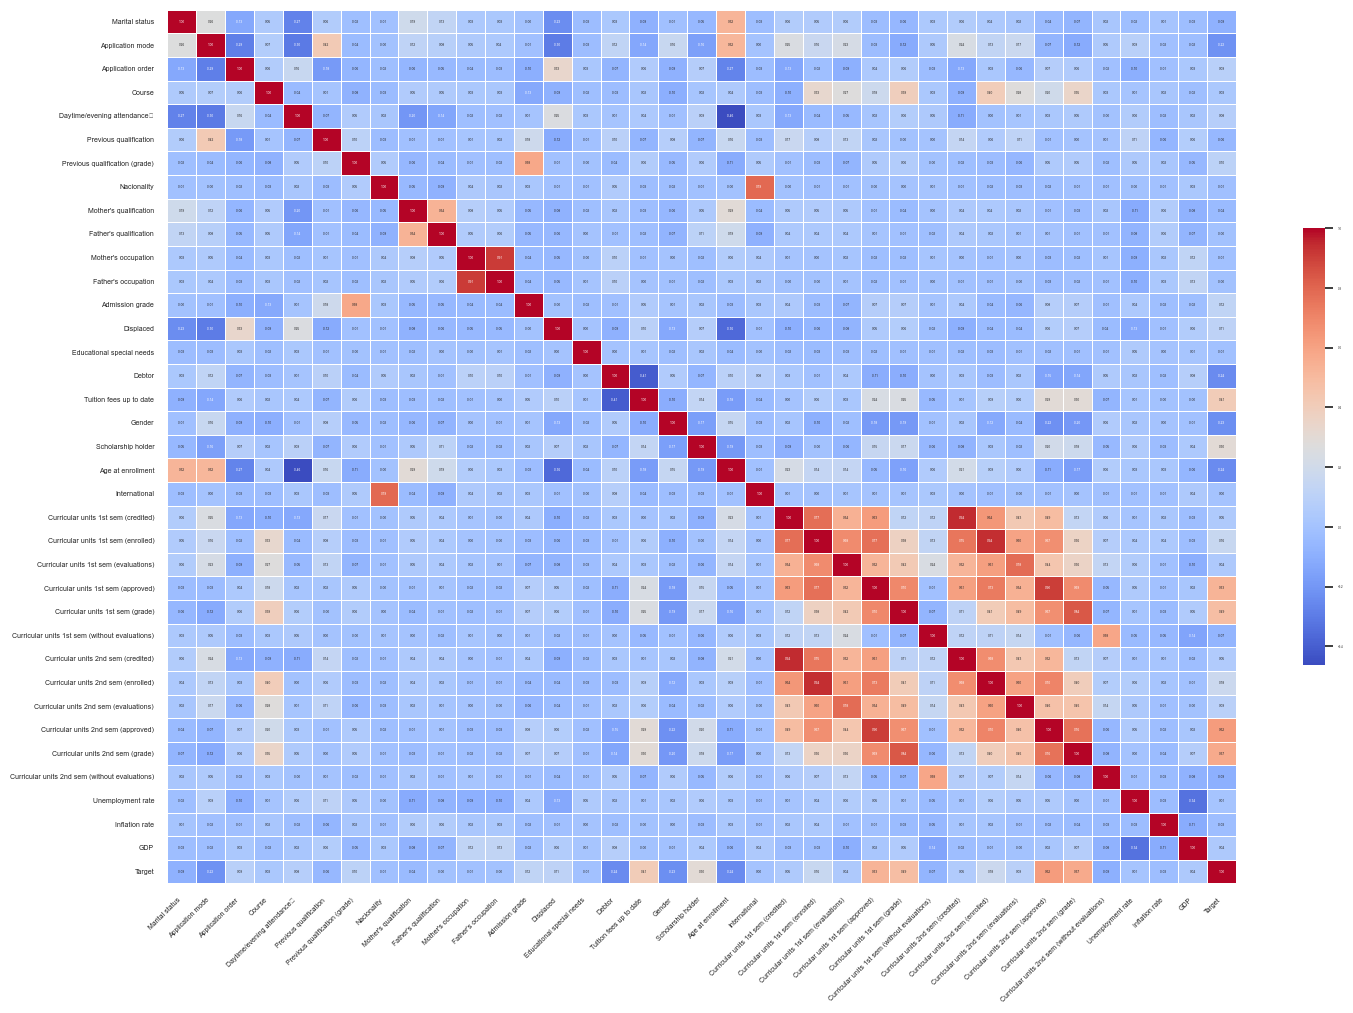

In [97]:
plt.figure(figsize=(15, 10))  # Increase figure size
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right', fontsize=5)  # Adjust x-axis labels
plt.yticks(fontsize=5)  # Adjust y-axis labels
plt.tight_layout()

plt.savefig('heatmap.png', dpi=1200)  # Save the figure with high DPI
plt.show()

In [98]:
corr = df.corr()['Target']

In [99]:
features = corr[abs(corr) > 0.1].index.tolist()

if 'Target' not in features:
    features.append('Target')
    

df = df[features]

In [100]:
df

,Application mode,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,5,12.666667,2
4420,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,2,11.000000,0
4421,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,1,13.500000,0
4422,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,5,12.000000,2


In [101]:
# Plot the above values
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

plot_df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(plot_df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [102]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [103]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [104]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [105]:
fig = px.box(df, y='Age at enrollment')
fig.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

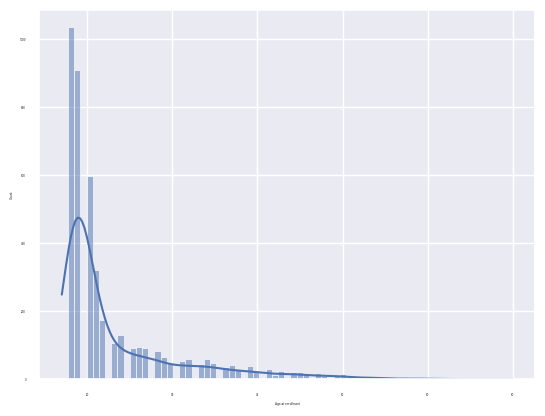

In [106]:
sns.histplot(data=df['Age at enrollment'], kde=True)


In [107]:
px.histogram(df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['red'])

<function matplotlib.pyplot.show(close=None, block=None)>

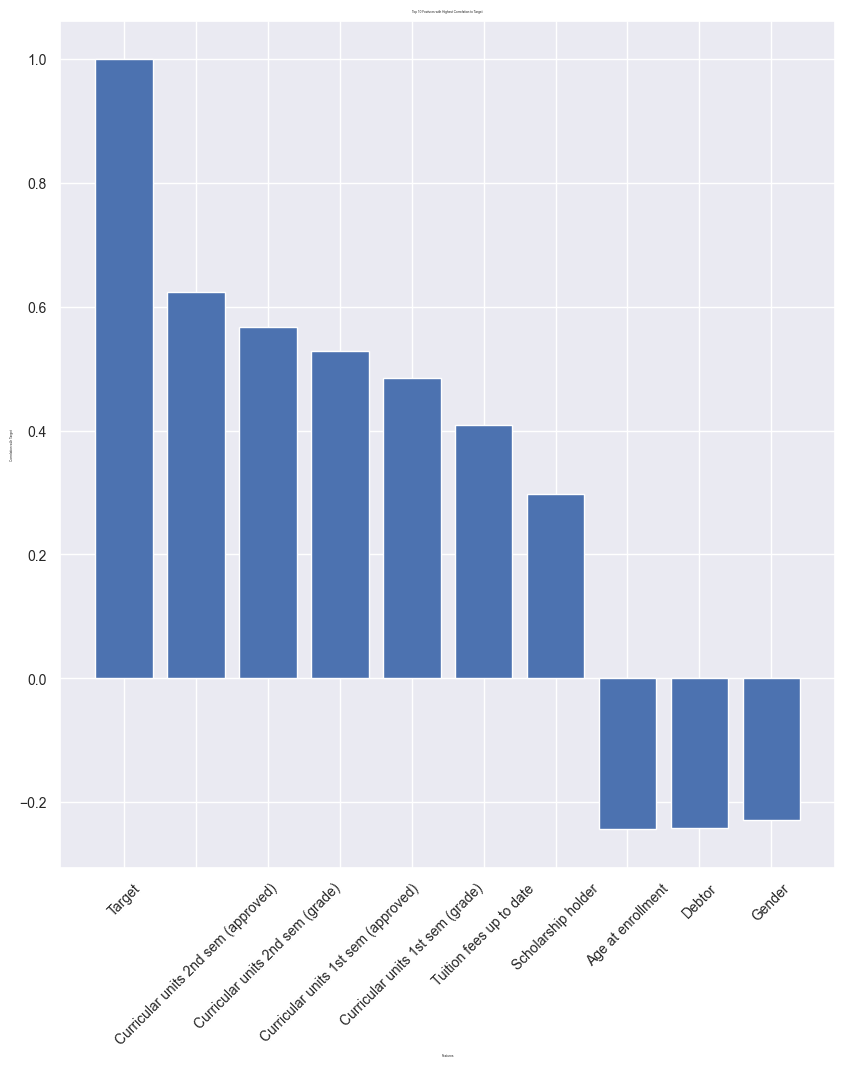

In [108]:
top_10_features = corr.abs().nlargest(10).index 
top_10_corr_values = corr[top_10_features]

plt.figure(figsize=(10,11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')

plt.ylabel('Correlation with Target')
plt.title("Top 10 Features with Highest Correlation to Target")
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show

In [109]:
X = df.drop('Target', axis=1)
y = df['Target']

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns)

In [111]:
X.describe()

,Application mode,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.315519,0.395930,0.336612,0.548373,0.113698,0.880651,0.351718,0.248418,0.118210,0.241176,0.181023,0.563752,0.270963,0.221790,0.550857
std,0.312226,0.138825,0.152442,0.497711,0.317480,0.324235,0.477560,0.432144,0.143166,0.095391,0.119009,0.256618,0.095476,0.150738,0.280582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.315789,0.241053,0.000000,0.000000,1.000000,0.000000,0.000000,0.037736,0.192308,0.115385,0.582781,0.217391,0.100000,0.578846
50%,0.285714,0.401053,0.327368,1.000000,0.000000,1.000000,0.000000,0.000000,0.056604,0.230769,0.192308,0.650899,0.260870,0.250000,0.656923
75%,0.678571,0.473684,0.418947,1.000000,0.000000,1.000000,1.000000,0.000000,0.150943,0.269231,0.230769,0.709934,0.304348,0.300000,0.717949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
X.shape

(4424, 15)

In [113]:
X

,Application mode,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0.285714,0.284211,0.340000,1.0,0.0,1.0,1.0,0.0,0.056604,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,0.250000,0.684211,0.500000,1.0,0.0,0.0,1.0,0.0,0.037736,0.230769,0.230769,0.741722,0.260870,0.30,0.735897
2,0.000000,0.284211,0.313684,1.0,0.0,0.0,1.0,0.0,0.037736,0.230769,0.000000,0.000000,0.260870,0.00,0.000000
3,0.285714,0.284211,0.258947,1.0,0.0,1.0,0.0,0.0,0.056604,0.230769,0.230769,0.711447,0.260870,0.25,0.667692
4,0.678571,0.052632,0.489474,0.0,0.0,1.0,0.0,0.0,0.528302,0.230769,0.192308,0.653422,0.260870,0.30,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.000000,0.315789,0.286316,0.0,0.0,1.0,1.0,0.0,0.037736,0.230769,0.192308,0.720530,0.260870,0.25,0.682051
4420,0.000000,0.263158,0.252632,1.0,1.0,0.0,0.0,0.0,0.018868,0.230769,0.230769,0.635762,0.260870,0.10,0.592308
4421,0.000000,0.621053,0.573684,1.0,0.0,1.0,0.0,1.0,0.245283,0.269231,0.269231,0.790066,0.347826,0.05,0.726923
4422,0.000000,0.894737,0.618947,1.0,0.0,1.0,0.0,1.0,0.056604,0.192308,0.192308,0.731126,0.217391,0.25,0.646154


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Without Tuning

In [115]:
## Logistic Regression

In [116]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 74.35 %


In [117]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 65.88 %


In [118]:
svm = svm.SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 73.79 %


In [119]:
rfc = RandomForestClassifier(random_state=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 76.05 %


In [120]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 75.37 %


In [121]:

xbc = XGBClassifier(tree_method='hist', device = "cuda")
xbc.fit(X_train, y_train)
y_pred = xbc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 74.8 %


In [122]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 75.82 %


In [123]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 76.16 %
